In [1]:
import squigglepy as sq

from datetime import datetime
from pprint import pprint

from libs import run_model, plot_exponential_growth, analyze_agi_arrival, calculate_doubling_time
from model_params import start_task_length, agi_task_length, doubling_time, shift, current_best_date

print("Loaded libraries")

Loaded libraries


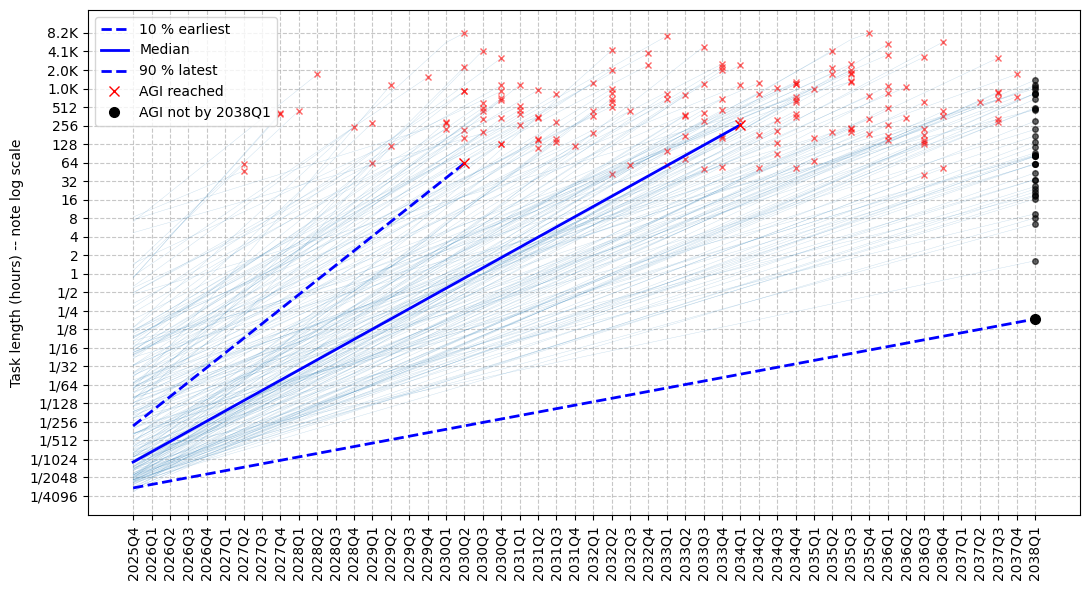

In [2]:
samples = plot_exponential_growth(
    doubling_time_days=doubling_time,
    start_hours=start_task_length,
    start_date=current_best_date,
    agi_task_length=agi_task_length,
    shift=shift,
    n_quarters=49,
    n_samples=100_000,
    n_traces=200,
    max_task_power=13,
    min_y_power=-15,
)

In [3]:
### UNDER CONSTRUCTION

"""
╔══════════════════════════════════════════════════════════╗
║                                                          ║
║                  UNDER CONSTRUCTION                      ║
║                                                          ║
║                      /\                                  ║
║                     /  \                                 ║
║                    / !! \                                ║
║                   /      \                               ║
║                  /   O    \                              ║
║                 /   /|\    \                             ║
║                /   / | \    \                            ║
║               /     _|_      \                           ║
║              /     / |        \                          ║
║             /     /  |         \                         ║
║            /    _/   |__        \                        ║
║           /    /        \        \                       ║
║          /    |          |________\                      ║
║         /     |         /           \                    ║
║        /______|________/─────────────\                   ║
║              Digging...                                  ║
║                                                          ║
║              PARDON OUR DUST                             ║
║                                                          ║
║        This part is currently being built!               ║
║          Please check back soon...                       ║
║                                                          ║
║                                                          ║
╚══════════════════════════════════════════════════════════╝
"""

'\n╔══════════════════════════════════════════════════════════╗\n║                                                          ║\n║                  UNDER CONSTRUCTION                      ║\n║                                                          ║\n║                      /\\                                  ║\n║                     /  \\                                 ║\n║                    / !! \\                                ║\n║                   /      \\                               ║\n║                  /   O    \\                              ║\n║                 /   /|\\    \\                             ║\n║                /   / | \\    \\                            ║\n║               /     _|_      \\                           ║\n║              /     / |        \\                          ║\n║             /     /  |         \\                         ║\n║            /    _/   |__        \\                        ║\n║           /    /        \\        \\                

In [4]:
# -----------
# ACCELERATION: Is the curve actually superexponential or subexponential? Does the doubling time itself change? Set the curve parameter.

print("\n\n")
print("## ACCELERATION")
acceleration = sq.mixture([
        [0.1, 1 + sq.lognorm(0.005, 0.1, credibility=80)],
        [0.8, 1],
        [0.1, 1 - sq.lognorm(0.005, 0.1, credibility=80)],
    ])
pprint(sq.get_percentiles(acceleration @ 100_000, digits=3))




## ACCELERATION
{1: 0.903,
 5: 0.978,
 10: 1.0,
 20: 1.0,
 30: 1.0,
 40: 1.0,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 95: 1.022,
 99: 1.098}


In [5]:
def adapted_metr_model():
    start_task_length_ = start_task_length * (2 ** (shift / doubling_time))
    days = calculate_doubling_time(start_task_length_, agi_task_length, doubling_time)
    measurement_error_variance = sq.invlognorm(0.8, 1.5) # Add measurement error on tasks: SD fit to trend variance from Figure 12
    return days * measurement_error_variance

samples = run_model(adapted_metr_model, index_date=current_best_date, cores=4)
print('\n\n')
analyze_agi_arrival(samples)

Generating samples with 4 cores...


100%|███████████████████████████████████████████████████████████████████████████| 100000/100000 [00:28<00:00, 3517.56it/s]


Shuffling data...
Waiting for other cores...


100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2323.07it/s]


...Collected!
{1: 971,
 5: 1445,
 10: 1735,
 20: 2148,
 30: 2514,
 40: 2851,
 50: 3210,
 60: 3634,
 70: 4113,
 80: 4749,
 90: 5756,
 95: 6799,
 99: 9179}

-

{1: '2028 Jul 17',
 5: '2029 Nov 04',
 10: '2030 Aug 20',
 20: '2031 Oct 07',
 30: '2032 Oct 08',
 40: '2033 Sep 10',
 50: '2034 Sep 04',
 60: '2035 Nov 01',
 70: '2037 Feb 22',
 80: '2038 Nov 21',
 90: '2041 Aug 23',
 95: '2044 Jul 02',
 99: '2051 Jan 07'}



## DISTRIBUTION OF AGI ARRIVAL DATE ##
1%: 2027.7
2%: 2028.1
3%: 2028.5
4%: 2028.7
5%: 2029.0
10%: 2029.8
15%: 2030.3
20%: 2030.9
25%: 2031.4
35%: 2032.4
50%: 2033.8
60%: 2035.0
75%: 2037.1
80%: 2038.0
90%: 2040.8
95%: 2043.6


## DISTRIBUTION OF RELATIVE AGI ARRIVAL DATE ##
1%: 2.7 years from now
2%: 3.1 years from now
3%: 3.5 years from now
4%: 3.7 years from now
5%: 4.0 years from now
10%: 4.8 years from now
15%: 5.3 years from now
20%: 5.9 years from now
25%: 6.4 years from now
35%: 7.4 years from now
50%: 8.8 years from now
60%: 10.0 years from now
75%: 12.1 years from 